# Regression Deep Learning Model for Allstate Claims Severity Using TensorFlow Take 7
### David Lowe
### February 25, 2020

Template Credit: Adapted from a template made available by Dr. Jason Brownlee of Machine Learning Mastery. [https://machinelearningmastery.com/]

SUMMARY: The purpose of this project is to construct a predictive model using various machine learning algorithms and to document the end-to-end steps using a template. The Allstate Claims Severity dataset is a regression situation where we are trying to predict the value of a continuous variable.

INTRODUCTION: Allstate is interested in developing automated methods of predicting the cost, and hence severity, of claims. In this Kaggle challenge, the contestants were asked to create an algorithm which could accurately predicts claims severity. Each row in this dataset represents an insurance claim. The task is to predict the value for the 'loss' column. Variables prefaced with 'cat' are categorical, while those prefaced with 'cont' are continuous.

In iteration Take1, we constructed machine learning models using the original dataset and with minimum data preparation and no feature engineering. The XGBoost model serves as the baseline for the future iterations of modeling.

In iteration Take2, we tuned additional parameters of the XGBoost model and improved the MAE metric further.

In iteration Take3, we constructed several basic Multilayer Perceptron (MLP) models with one hidden layer. The basic MLP model serves as the baseline model as we build more complex MLP models in future iterations.

In iteration Take4, we constructed several Multilayer Perceptron (MLP) models with two hidden layers. We also observed whether the additional hidden layer has a positive effect on MAE when compared to models that have just one hidden layer.

In iteration Take5, we constructed several Multilayer Perceptron (MLP) models with three hidden layers. We also observed whether the additional hidden layer has a positive effect on MAE when compared to models that have just one or two hidden layers.

In iteration Take6, we constructd several three-layer Multilayer Perceptron (MLP) models with batch normalization. We also observed whether the batch normalization technique has a positive effect on MAE when compared to models without the batch normalization.

In this iteration, we will tune the MLP model that has 512/128/64 nodes and 0.25/0.25/0.25 Dropout ratios. We will perform a grid search for the most optimized model using different learning rates, kernel initializers, and batch sizes.

ANALYSIS: In iteration Take1, the baseline performance of the machine learning algorithms achieved an average MAE of 1301. eXtreme Gradient Boosting (XGBoost) achieved the top MAE metric after the first round of modeling. After a series of tuning trials, XGBoost achieved an MAE metric of 1199. By using the optimized parameters, the XGBoost algorithm processed the test dataset with an MAE of 1204, which was in line with the MAE prediction from the training data.

In iteration Take2, the further-tuned eXtreme Gradient Boosting (XGBoost) model achieved an improved MAE metric of 1191 using the training data. By using the same optimized parameters, the XGBoost algorithm processed the test dataset with an MAE of 1195, which was in line with the MAE prediction from the training data.

In iteration Take3, the simple MLP model with 128 nodes achieved an MAE metric of 1193 on the test dataset after 50 epochs. The MLP model with 1024 nodes processed the same test dataset with an MAE of 1170 after the same number of epochs but with a much larger over-fitting.

In iteration Take4, the MLP model with 128/64 nodes and 0.25/0.25 Dropout ratios achieved an MAE metric of 1169 on the test dataset after 31 epochs. The MLP model with 256/128 nodes and 0.25/0.50 Dropout ratios also processed the same test dataset with an MAE of 1169 after 25 epochs.

In iteration Take5, the MLP model with 512/128/64 nodes and 0.25/0.50/0.50 Dropout ratios achieved an MAE metric of 1164 on the test dataset after 16 epochs. The MLP model with 1024/512/256 nodes and 0.25/0.50/0.50 Dropout ratios also processed the same test dataset with an MAE of 1164 after 9 epochs.

In iteration Take6, the MLP model with 512/128/64 nodes and 0.25/0.25/0.25 Dropout ratios achieved an MAE metric of 1157 on the test dataset after 22 epochs. The MLP model with 1024/512/256 nodes and 0.50/0.50/0.50 Dropout ratios also processed the same test dataset with an MAE of 1159 after 48 epochs.

In this Take7 iteration, the models with the learning rate of 0.0005 seemed to produce the most stable training and testing loss curves. Those models also achieved the MAEs between 1158-1161 for the testing dataset around 20 epochs before they started to overfit.

CONCLUSION: For this iteration, the 512/128/64 nodes and 0.25/0.25/0.25 Dropout MLP model achieved good overall results using the learning rate of 0.0005. For this dataset, we should consider using this model for further modeling activities or production uses.

Dataset Used: Allstate Claims Severity Data Set

Dataset ML Model: Regression with numerical and categorical attributes

Dataset Reference: https://www.kaggle.com/c/allstate-claims-severity/data

One potential source of performance benchmarks: https://www.kaggle.com/c/allstate-claims-severity/leaderboard

Any deep-learning modeling project genrally can be broken down into about seven major tasks:

0. Prepare Environment
1. Load Data
2. Define Model
3. Fit and Evaluate Model
4. Optimize Model
5. Finalize Model

# Section 0. Prepare Environment

In [0]:
# Retrieve GPU information
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Mon Feb 17 18:42:14 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.48.02    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
# Set the random seed number for reproducible results
seedNum = 888

In [0]:
# Load libraries and packages
import random
random.seed(seedNum)
import numpy as np
np.random.seed(seedNum)
import tensorflow as tf
tf.random.set_seed(seedNum)
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
import pandas as pd
import math
import os
import sys
import shutil
import urllib.request
import zipfile
import smtplib
import matplotlib.pyplot as plt
from datetime import datetime
from email.message import EmailMessage
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing

In [0]:
# Begin the timer for the script processing
startTimeScript = datetime.now()

# Set up the verbose flag to print detailed messages for debugging (setting to True will activate)
# verbose = True
# tf.debugging.set_log_device_placement(verbose)

# Set up the number of CPU cores available for multi-thread processing
n_jobs = -1
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Set up the flag to stop sending progress emails (setting to True will send status emails!)
notifyStatus = False

# Set the number of folds for cross validation
n_folds = 5

# Set the flag for splitting the dataset
splitDataset = True
splitPercentage = 0.25

# Set various default Keras modeling parameters
default_loss = 'mae'
default_optimizer = tf.optimizers.Adam(learning_rate=0.001)
default_kernel_init = tf.initializers.RandomNormal(seed=seedNum)
default_epoch = 50
default_batch = 64

Num GPUs Available:  1


In [0]:
# Set up the email notification function
def email_notify(msg_text):
    sender = os.environ.get('MAIL_SENDER')
    receiver = os.environ.get('MAIL_RECEIVER')
    gateway = os.environ.get('SMTP_GATEWAY')
    smtpuser = os.environ.get('SMTP_USERNAME')
    password = os.environ.get('SMTP_PASSWORD')
    if sender==None or receiver==None or gateway==None or smtpuser==None or password==None:
        sys.exit("Incomplete email setup info. Script Processing Aborted!!!")
    msg = EmailMessage()
    msg.set_content(msg_text)
    msg['Subject'] = 'Notification from Keras Regression Script'
    msg['From'] = sender
    msg['To'] = receiver
    server = smtplib.SMTP(gateway, 587)
    server.starttls()
    server.login(smtpuser, password)
    server.send_message(msg)
    server.quit()

In [0]:
# Reset the random number generators
def reset_random(x):
    random.seed(x)
    np.random.seed(x)
    tf.random.set_seed(x)

In [0]:
if (notifyStatus): email_notify("Phase 0 Prepare Environment completed! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

# Section 1. Load Data

In [0]:
if (notifyStatus): email_notify("Phase 1 Load Data has begun! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

## 1.a) Load Dataset

In [0]:
dataset_path = 'https://dainesanalytics.com/datasets/py-classification-allstate-claims-severity/train.csv'
Xy_original = pd.read_csv(dataset_path)

# Take a peek at the dataframe after the import
Xy_original.head(10)

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,...,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,B,B,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,...,A,D,D,C,E,E,A,D,L,O,A,B,E,F,H,F,A,AB,DK,A,C,AF,A,I,GK,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,C,E,E,D,T,I,D,A,A,E,E,I,K,K,BI,CS,C,N,AE,A,O,DJ,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,H,D,B,D,E,E,A,P,F,J,A,A,D,E,K,G,B,H,C,C,Y,BM,A,K,CK,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85
5,13,A,B,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,D,E,C,A,P,J,D,A,A,E,E,H,F,B,BI,CS,A,AS,AE,A,K,DJ,0.546670,0.681761,0.634224,0.373816,0.302678,0.364464,0.401162,0.26847,0.46226,0.50556,0.366788,0.359249,0.345247,0.726792,5142.87
6,14,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,...,A,D,D,D,E,C,A,P,J,A,A,C,E,E,H,F,B,BI,DK,A,J,AF,A,K,DJ,0.471447,0.737068,0.613660,0.189137,0.295397,0.381515,0.363768,0.24564,0.40455,0.47225,0.334828,0.352251,0.342239,0.382931,1132.22
7,20,A,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,B,A,A,A,B,A,A,A,A,A,A,A,...,A,C,B,C,E,A,C,T,H,C,A,A,K,F,F,I,G,BI,EB,G,AH,Y,A,P,LO,0.826591,0.488789,0.263570,0.623770,0.473767,0.867021,0.583389,0.90267,0.84847,0.80218,0.644013,0.785706,0.859764,0.242416,3585.75
8,23,A,B,B,B,B,A,A,A,B,B,B,B,B,A,A,B,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,B,A,B,A,...,A,D,C,C,E,C,D,T,C,Q,A,C,H,F,G,M,K,BI,BC,C,K,AX,A,Q,IE,0.330514,0.555782,0.440642,0.473202,0.281143,0.628534,0.384099,0.61229,0.38249,0.51111,0.682315,0.669033,0.756454,0.361191,10280.20
9,24,A,B,A,A,B,B,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,B,B,...,H,D,B,C,E,A,C,T,F,D,A,F,K,H,G,J,G,BU,DW,A,U,S,J,O,LY,0.726300,0.358319,0.356819,0.802892,0.310061,0.713343,0.469223,0.30260,0.67135,0.83510,0.863052,0.879347,0.822493,0.294523,6184.59


In [0]:
Xy_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


In [0]:
Xy_original.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


In [0]:
print(Xy_original.isnull().sum())
print('Total number of NaN in the dataframe: ', Xy_original.isnull().sum().sum())

id        0
cat1      0
cat2      0
cat3      0
cat4      0
         ..
cont11    0
cont12    0
cont13    0
cont14    0
loss      0
Length: 132, dtype: int64
Total number of NaN in the dataframe:  0


## 1.b) Data Cleaning

In [0]:
# Standardize the class column to the name of targetVar if required
Xy_original = Xy_original.rename(columns={'loss': 'targetVar'})

# Dropping unnecessary feature(s)
Xy_original.drop(columns=['id'], inplace=True)

# Convert columns from one data type to another
categorical_cols = ["cat" + str(i) for i in range(1,117)]
Xy_original[categorical_cols] = Xy_original[categorical_cols].astype('category')

# Take a peek at the dataframe after the cleaning
Xy_original.head(10)

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,...,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,targetVar
0,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,A,B,A,A,B,A,A,A,B,B,B,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,...,A,D,D,C,E,E,A,D,L,O,A,B,E,F,H,F,A,AB,DK,A,C,AF,A,I,GK,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,B,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,C,E,E,D,T,I,D,A,A,E,E,I,K,K,BI,CS,C,N,AE,A,O,DJ,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,H,D,B,D,E,E,A,P,F,J,A,A,D,E,K,G,B,H,C,C,Y,BM,A,K,CK,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85
5,A,B,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,D,E,C,A,P,J,D,A,A,E,E,H,F,B,BI,CS,A,AS,AE,A,K,DJ,0.546670,0.681761,0.634224,0.373816,0.302678,0.364464,0.401162,0.26847,0.46226,0.50556,0.366788,0.359249,0.345247,0.726792,5142.87
6,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,...,A,D,D,D,E,C,A,P,J,A,A,C,E,E,H,F,B,BI,DK,A,J,AF,A,K,DJ,0.471447,0.737068,0.613660,0.189137,0.295397,0.381515,0.363768,0.24564,0.40455,0.47225,0.334828,0.352251,0.342239,0.382931,1132.22
7,A,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,B,A,A,A,B,A,A,A,A,A,A,A,A,...,A,C,B,C,E,A,C,T,H,C,A,A,K,F,F,I,G,BI,EB,G,AH,Y,A,P,LO,0.826591,0.488789,0.263570,0.623770,0.473767,0.867021,0.583389,0.90267,0.84847,0.80218,0.644013,0.785706,0.859764,0.242416,3585.75
8,A,B,B,B,B,A,A,A,B,B,B,B,B,A,A,B,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,B,A,B,A,A,...,A,D,C,C,E,C,D,T,C,Q,A,C,H,F,G,M,K,BI,BC,C,K,AX,A,Q,IE,0.330514,0.555782,0.440642,0.473202,0.281143,0.628534,0.384099,0.61229,0.38249,0.51111,0.682315,0.669033,0.756454,0.361191,10280.20
9,A,B,A,A,B,B,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,B,B,B,...,H,D,B,C,E,A,C,T,F,D,A,F,K,H,G,J,G,BU,DW,A,U,S,J,O,LY,0.726300,0.358319,0.356819,0.802892,0.310061,0.713343,0.469223,0.30260,0.67135,0.83510,0.863052,0.879347,0.822493,0.294523,6184.59


In [0]:
Xy_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 131 entries, cat1 to targetVar
dtypes: category(116), float64(15)
memory usage: 42.8 MB


In [0]:
Xy_original.describe()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,targetVar
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


In [0]:
print(Xy_original.isnull().sum())
print('Total number of NaN in the dataframe: ', Xy_original.isnull().sum().sum())

cat1         0
cat2         0
cat3         0
cat4         0
cat5         0
            ..
cont11       0
cont12       0
cont13       0
cont14       0
targetVar    0
Length: 131, dtype: int64
Total number of NaN in the dataframe:  0


## 1.c) Feature Scaling and Pre-processing

In [0]:
# Use variable totCol to hold the number of columns in the dataframe
totCol = len(Xy_original.columns)

# Set up variable totAttr for the total number of attribute columns
totAttr = totCol-1

# targetCol variable indicates the column location of the target/class variable
# If the first column, set targetCol to 1. If the last column, set targetCol to totCol
# If (targetCol <> 1) and (targetCol <> totCol), be aware when slicing up the dataframes for visualization
targetCol = totCol

In [0]:
# We create attribute-only and target-only datasets (X_original and y_original)
# for various visualization and cleaning/transformation operations

if targetCol == totCol:
    X_original = Xy_original.iloc[:,0:totAttr]
    y_original = Xy_original.iloc[:,totAttr]
else:
    X_original = Xy_original.iloc[:,1:totCol]
    y_original = Xy_original.iloc[:,0]

print("Xy_original.shape: {} X_original.shape: {} y_original.shape: {}".format(Xy_original.shape, X_original.shape, y_original.shape))

Xy_original.shape: (188318, 131) X_original.shape: (188318, 130) y_original.shape: (188318,)


## 1.d) Splitting Data into Training and Test Sets

In [0]:
# Perform one-hot-encoding before splitting into trainig and test
X_original = pd.get_dummies(X_original)
print(X_original.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 1153 entries, cont1 to cat116_Y
dtypes: float64(14), uint8(1139)
memory usage: 224.7 MB
None


In [0]:
X_encoded = X_original.to_numpy()
y_encoded = y_original.to_numpy()
if (splitDataset):
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=splitPercentage, random_state=seedNum)
else:
    X_train, y_train = X_encoded, y_encoded
    X_test, y_test = X_encoded, y_encoded
print("X_train.shape: {} X_train.type: {}".format(X_train.shape, type(X_train)))
print("y_train.shape: {} y_train.type: {}".format(y_train.shape, type(y_train)))
print("X_test.shape: {} X_test.type: {}".format(X_test.shape, type(X_test)))
print("y_test.shape: {} y_test.type: {}".format(y_test.shape, type(y_test)))

X_train.shape: (141238, 1153) X_train.type: <class 'numpy.ndarray'>
y_train.shape: (141238,) y_train.type: <class 'numpy.ndarray'>
X_test.shape: (47080, 1153) X_test.type: <class 'numpy.ndarray'>
y_test.shape: (47080,) y_test.type: <class 'numpy.ndarray'>


In [0]:
if (notifyStatus): email_notify("Phase 1 Load Data completed! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

# Section 2. Define Baseline Model Architecture

In [0]:
if (notifyStatus): email_notify("Phase 2 Define Model has begun! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

In [0]:
# Define the baseline model
def create_baseline_model():
    default_model = Sequential()
    default_model.add(Dense(512, input_shape=(X_train.shape[1],), activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dropout(0.25))
    default_model.add(Dense(256, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dropout(0.25))
    default_model.add(Dense(128, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dropout(0.25))
    default_model.add(Dense(1, kernel_initializer=default_kernel_init))
    default_model.compile(loss=default_loss, optimizer=default_optimizer)
    return default_model

In [0]:
if (notifyStatus): email_notify("Phase 2 Define Model completed! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

# Section 3. Fit and Evaluate Model

In [0]:
if (notifyStatus): email_notify("Phase 3 Fit and Evaluate Model has begun! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

In [0]:
# Initialize the baseline model
startTimeModule = datetime.now()
reset_random(seedNum)
baseline_model = create_baseline_model()
baseline_hist = baseline_model.fit(X_train, y_train, epochs=default_epoch, batch_size=default_batch, validation_data=(X_test, y_test), verbose=1)
print('Total time for fitting the baseline model:', (datetime.now() - startTimeModule))

Train on 141238 samples, validate on 47080 samples
Epoch 1/50
141238/141238 [==============================] - 13s 95us/sample - loss: 2577.7447 - val_loss: 1866.7759
Epoch 2/50
141238/141238 [==============================] - 10s 74us/sample - loss: 1394.5094 - val_loss: 1224.8142
Epoch 3/50
141238/141238 [==============================] - 11s 77us/sample - loss: 1216.9541 - val_loss: 1183.7606
Epoch 4/50
141238/141238 [==============================] - 11s 81us/sample - loss: 1204.6100 - val_loss: 1177.6956
Epoch 5/50
141238/141238 [==============================] - 11s 79us/sample - loss: 1197.6754 - val_loss: 1173.8761
Epoch 6/50
141238/141238 [==============================] - 11s 77us/sample - loss: 1191.0528 - val_loss: 1171.4993
Epoch 7/50
141238/141238 [==============================] - 11s 76us/sample - loss: 1187.6323 - val_loss: 1167.7370
Epoch 8/50
141238/141238 [==============================] - 11s 75us/sample - loss: 1185.3947 - val_loss: 1161.8134
Epoch 9/50
141238/141

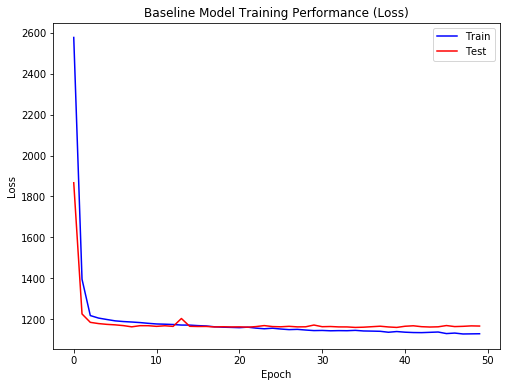

In [0]:
# Summarize model training hisotry
fig, axs = plt.subplots(1, 1, figsize=(8,6))
plt.subplot(111)
plt.plot(baseline_hist.history['loss'], color='blue', label='train')
plt.plot(baseline_hist.history['val_loss'], color='red', label='test')
plt.title('Baseline Model Training Performance (Loss)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [0]:
if (notifyStatus): email_notify("Phase 3 Fit and Evaluate Model completed! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

# Section 4. Optimize Model

In [0]:
if (notifyStatus): email_notify("Phase 4 Optimize Model has begun! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

In [0]:
# Define the customized model
def create_customized_model(optimizer, kernel_init):
    customized_model = Sequential()
    customized_model.add(Dense(512, input_shape=(X_train.shape[1],), activation='relu', kernel_initializer=kernel_init))
    customized_model.add(BatchNormalization())
    customized_model.add(Dropout(0.25))
    customized_model.add(Dense(256, activation='relu', kernel_initializer=kernel_init))
    customized_model.add(BatchNormalization())
    customized_model.add(Dropout(0.25))
    customized_model.add(Dense(128, activation='relu', kernel_initializer=kernel_init))
    customized_model.add(BatchNormalization())
    customized_model.add(Dropout(0.25))
    customized_model.add(Dense(1, kernel_initializer=kernel_init))
    customized_model.compile(loss=default_loss, optimizer=optimizer)
    return customized_model

Optimizer candidate #1 has the object ID of <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7ff86fbbc630>
Optimizer candidate #2 has the object ID of <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7ff86fbbc6a0>
Optimizer candidate #3 has the object ID of <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7ff86fbbc710>
Optimizer candidate #4 has the object ID of <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7ff86fbbc748>
Optimizer candidate #5 has the object ID of <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7ff86fbbc780>
Initializer candidate #1 has the object ID of <tensorflow.python.ops.init_ops_v2.RandomNormal object at 0x7ff86f27c0f0>
Initializer candidate #2 has the object ID of <tensorflow.python.ops.init_ops_v2.Orthogonal object at 0x7ff86f27c208>
Initializer candidate #2 has the object ID of <tensorflow.python.ops.init_ops_v2.GlorotNormal object at 0x7ff86f27c2b0>

Forming the grid-search model #0 using: optimizer=<

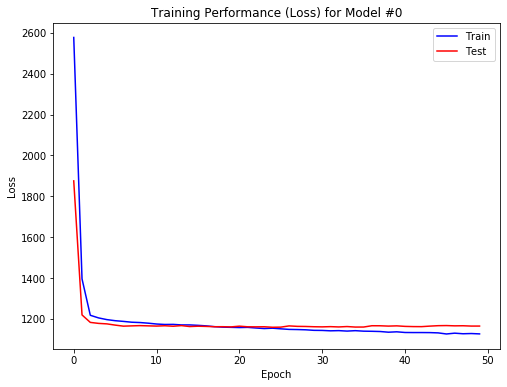


Forming the grid-search model #1 using: optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7ff86fbbc630>, kernel=<tensorflow.python.ops.init_ops_v2.RandomNormal object at 0x7ff86f27c0f0>, epochs=50, batch_size=128
Train on 141238 samples, validate on 47080 samples
Epoch 1/50
141238/141238 [==============================] - 6s 46us/sample - loss: 2545.3761 - val_loss: 2039.8943
Epoch 2/50
141238/141238 [==============================] - 5s 39us/sample - loss: 1585.5325 - val_loss: 1344.4483
Epoch 3/50
141238/141238 [==============================] - 5s 39us/sample - loss: 1237.6655 - val_loss: 1198.2737
Epoch 4/50
141238/141238 [==============================] - 5s 38us/sample - loss: 1190.8189 - val_loss: 1175.5051
Epoch 5/50
141238/141238 [==============================] - 5s 39us/sample - loss: 1180.1731 - val_loss: 1167.3201
Epoch 6/50
141238/141238 [==============================] - 5s 39us/sample - loss: 1173.9543 - val_loss: 1174.1674
Epoch 7/50
141238/141238 

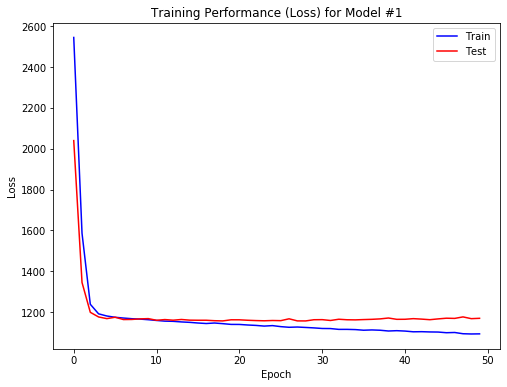


Forming the grid-search model #2 using: optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7ff86fbbc630>, kernel=<tensorflow.python.ops.init_ops_v2.Orthogonal object at 0x7ff86f27c208>, epochs=50, batch_size=64
Train on 141238 samples, validate on 47080 samples
Epoch 1/50
141238/141238 [==============================] - 11s 78us/sample - loss: 2083.5226 - val_loss: 1358.3345
Epoch 2/50
141238/141238 [==============================] - 10s 72us/sample - loss: 1247.7546 - val_loss: 1185.6867
Epoch 3/50
141238/141238 [==============================] - 10s 73us/sample - loss: 1208.2478 - val_loss: 1175.7888
Epoch 4/50
141238/141238 [==============================] - 10s 73us/sample - loss: 1197.9283 - val_loss: 1181.3086
Epoch 5/50
141238/141238 [==============================] - 10s 72us/sample - loss: 1192.0163 - val_loss: 1168.6185
Epoch 6/50
141238/141238 [==============================] - 10s 73us/sample - loss: 1185.8693 - val_loss: 1165.5894
Epoch 7/50
141238/1412

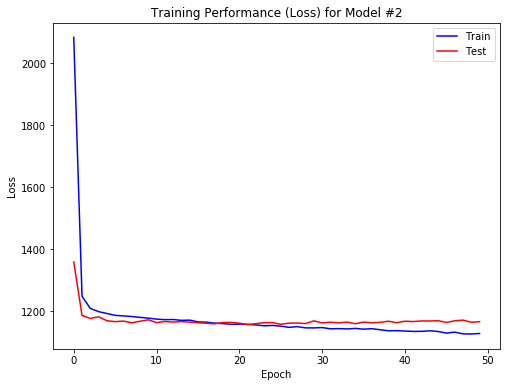


Forming the grid-search model #3 using: optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7ff86fbbc630>, kernel=<tensorflow.python.ops.init_ops_v2.Orthogonal object at 0x7ff86f27c208>, epochs=50, batch_size=128
Train on 141238 samples, validate on 47080 samples
Epoch 1/50
141238/141238 [==============================] - 6s 46us/sample - loss: 2543.8618 - val_loss: 2092.6806
Epoch 2/50
141238/141238 [==============================] - 5s 38us/sample - loss: 1583.7955 - val_loss: 1347.3485
Epoch 3/50
141238/141238 [==============================] - 6s 39us/sample - loss: 1234.6339 - val_loss: 1203.2899
Epoch 4/50
141238/141238 [==============================] - 5s 38us/sample - loss: 1190.6110 - val_loss: 1177.9912
Epoch 5/50
141238/141238 [==============================] - 6s 40us/sample - loss: 1178.6460 - val_loss: 1167.2660
Epoch 6/50
141238/141238 [==============================] - 6s 41us/sample - loss: 1172.3027 - val_loss: 1167.0147
Epoch 7/50
141238/141238 [=

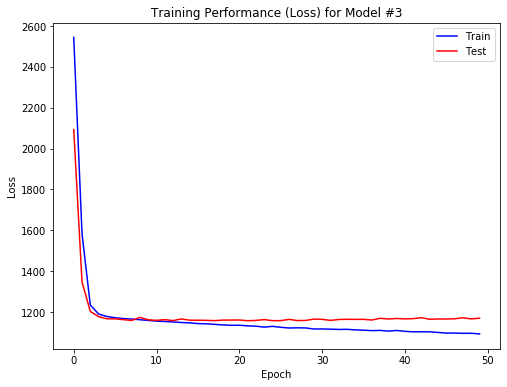


Forming the grid-search model #4 using: optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7ff86fbbc630>, kernel=<tensorflow.python.ops.init_ops_v2.GlorotNormal object at 0x7ff86f27c2b0>, epochs=50, batch_size=64
Train on 141238 samples, validate on 47080 samples
Epoch 1/50
141238/141238 [==============================] - 11s 78us/sample - loss: 2083.3799 - val_loss: 1373.1387
Epoch 2/50
141238/141238 [==============================] - 10s 74us/sample - loss: 1247.2624 - val_loss: 1186.6052
Epoch 3/50
141238/141238 [==============================] - 10s 74us/sample - loss: 1207.8699 - val_loss: 1175.0427
Epoch 4/50
141238/141238 [==============================] - 11s 75us/sample - loss: 1196.8455 - val_loss: 1173.7992
Epoch 5/50
141238/141238 [==============================] - 10s 73us/sample - loss: 1191.3111 - val_loss: 1170.5181
Epoch 6/50
141238/141238 [==============================] - 10s 73us/sample - loss: 1186.4526 - val_loss: 1172.8676
Epoch 7/50
141238/14

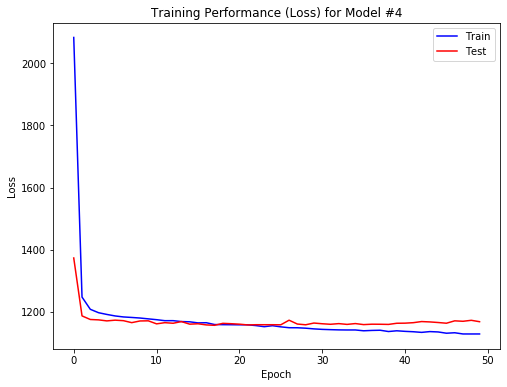


Forming the grid-search model #5 using: optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7ff86fbbc630>, kernel=<tensorflow.python.ops.init_ops_v2.GlorotNormal object at 0x7ff86f27c2b0>, epochs=50, batch_size=128
Train on 141238 samples, validate on 47080 samples
Epoch 1/50
141238/141238 [==============================] - 6s 44us/sample - loss: 2542.2930 - val_loss: 2051.0210
Epoch 2/50
141238/141238 [==============================] - 5s 38us/sample - loss: 1583.4526 - val_loss: 1381.5487
Epoch 3/50
141238/141238 [==============================] - 5s 38us/sample - loss: 1236.0606 - val_loss: 1208.3214
Epoch 4/50
141238/141238 [==============================] - 5s 38us/sample - loss: 1190.9160 - val_loss: 1177.0819
Epoch 5/50
141238/141238 [==============================] - 5s 39us/sample - loss: 1178.8802 - val_loss: 1168.5838
Epoch 6/50
141238/141238 [==============================] - 5s 38us/sample - loss: 1171.7687 - val_loss: 1167.4048
Epoch 7/50
141238/141238 

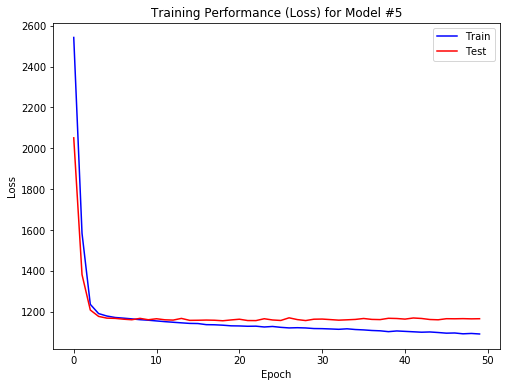


Forming the grid-search model #6 using: optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7ff86fbbc6a0>, kernel=<tensorflow.python.ops.init_ops_v2.RandomNormal object at 0x7ff86f27c0f0>, epochs=50, batch_size=64
Train on 141238 samples, validate on 47080 samples
Epoch 1/50
141238/141238 [==============================] - 11s 79us/sample - loss: 1531.2885 - val_loss: 1197.6379
Epoch 2/50
141238/141238 [==============================] - 10s 73us/sample - loss: 1220.2268 - val_loss: 1207.9489
Epoch 3/50
141238/141238 [==============================] - 10s 73us/sample - loss: 1210.9718 - val_loss: 1193.1278
Epoch 4/50
141238/141238 [==============================] - 10s 72us/sample - loss: 1202.6454 - val_loss: 1188.0346
Epoch 5/50
141238/141238 [==============================] - 10s 74us/sample - loss: 1198.6208 - val_loss: 1185.2803
Epoch 6/50
141238/141238 [==============================] - 11s 75us/sample - loss: 1194.4862 - val_loss: 1181.6690
Epoch 7/50
141238/14

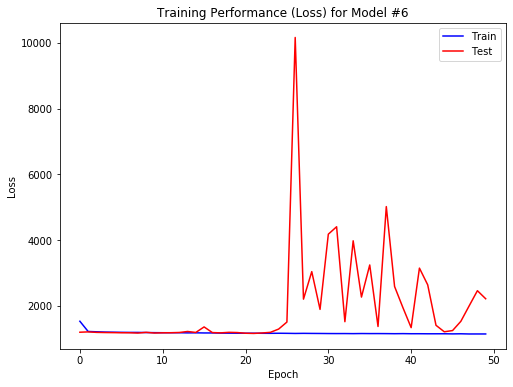


Forming the grid-search model #7 using: optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7ff86fbbc6a0>, kernel=<tensorflow.python.ops.init_ops_v2.RandomNormal object at 0x7ff86f27c0f0>, epochs=50, batch_size=128
Train on 141238 samples, validate on 47080 samples
Epoch 1/50
141238/141238 [==============================] - 7s 46us/sample - loss: 1380.0119 - val_loss: 1194.8560
Epoch 2/50
141238/141238 [==============================] - 6s 40us/sample - loss: 1197.9215 - val_loss: 1181.8316
Epoch 3/50
141238/141238 [==============================] - 5s 38us/sample - loss: 1187.7111 - val_loss: 1178.4106
Epoch 4/50
141238/141238 [==============================] - 5s 38us/sample - loss: 1182.4012 - val_loss: 1185.7614
Epoch 5/50
141238/141238 [==============================] - 6s 39us/sample - loss: 1174.5399 - val_loss: 1204.5089
Epoch 6/50
141238/141238 [==============================] - 5s 39us/sample - loss: 1171.3356 - val_loss: 1198.6697
Epoch 7/50
141238/141238 

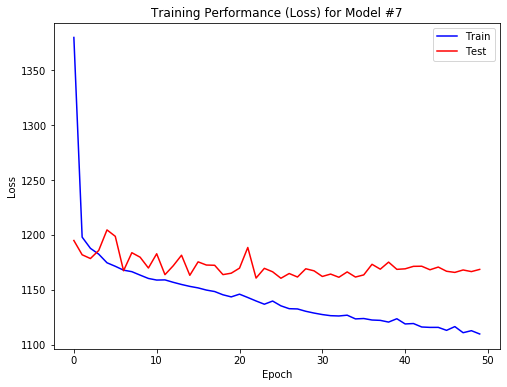


Forming the grid-search model #8 using: optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7ff86fbbc6a0>, kernel=<tensorflow.python.ops.init_ops_v2.Orthogonal object at 0x7ff86f27c208>, epochs=50, batch_size=64
Train on 141238 samples, validate on 47080 samples
Epoch 1/50
141238/141238 [==============================] - 11s 78us/sample - loss: 1316.2844 - val_loss: 1191.3628
Epoch 2/50
141238/141238 [==============================] - 11s 75us/sample - loss: 1213.8489 - val_loss: 1179.7348
Epoch 3/50
141238/141238 [==============================] - 11s 77us/sample - loss: 1203.3140 - val_loss: 1178.6331
Epoch 4/50
141238/141238 [==============================] - 10s 74us/sample - loss: 1195.3805 - val_loss: 1176.5611
Epoch 5/50
141238/141238 [==============================] - 10s 74us/sample - loss: 1190.2601 - val_loss: 1170.2355
Epoch 6/50
141238/141238 [==============================] - 10s 74us/sample - loss: 1187.3094 - val_loss: 1171.7183
Epoch 7/50
141238/1412

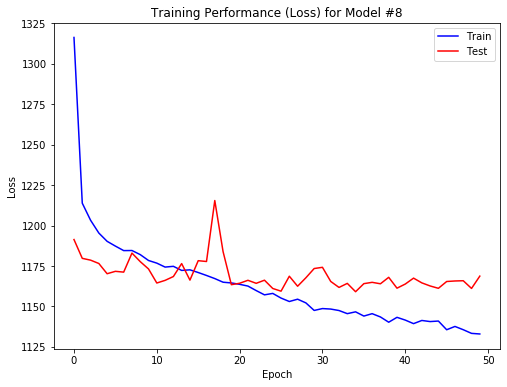


Forming the grid-search model #9 using: optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7ff86fbbc6a0>, kernel=<tensorflow.python.ops.init_ops_v2.Orthogonal object at 0x7ff86f27c208>, epochs=50, batch_size=128
Train on 141238 samples, validate on 47080 samples
Epoch 1/50
141238/141238 [==============================] - 6s 43us/sample - loss: 1377.5907 - val_loss: 1185.9690
Epoch 2/50
141238/141238 [==============================] - 5s 39us/sample - loss: 1196.5785 - val_loss: 1224.0885
Epoch 3/50
141238/141238 [==============================] - 5s 38us/sample - loss: 1187.5570 - val_loss: 1174.1967
Epoch 4/50
141238/141238 [==============================] - 5s 39us/sample - loss: 1181.3582 - val_loss: 1178.6812
Epoch 5/50
141238/141238 [==============================] - 5s 38us/sample - loss: 1174.2994 - val_loss: 1167.9868
Epoch 6/50
141238/141238 [==============================] - 5s 38us/sample - loss: 1170.1488 - val_loss: 1168.5028
Epoch 7/50
141238/141238 [=

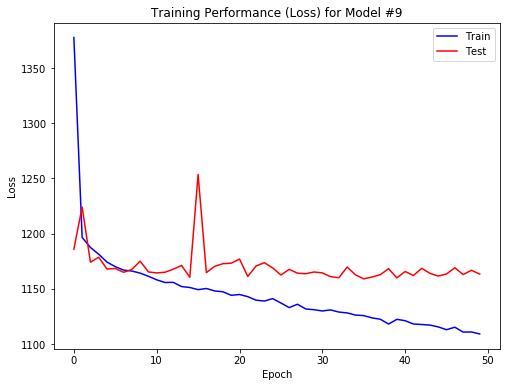


Forming the grid-search model #10 using: optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7ff86fbbc6a0>, kernel=<tensorflow.python.ops.init_ops_v2.GlorotNormal object at 0x7ff86f27c2b0>, epochs=50, batch_size=64
Train on 141238 samples, validate on 47080 samples
Epoch 1/50
141238/141238 [==============================] - 11s 79us/sample - loss: 1316.6249 - val_loss: 1187.4332
Epoch 2/50
141238/141238 [==============================] - 10s 71us/sample - loss: 1212.6005 - val_loss: 1177.5479
Epoch 3/50
141238/141238 [==============================] - 10s 70us/sample - loss: 1203.4249 - val_loss: 1178.6156
Epoch 4/50
141238/141238 [==============================] - 10s 71us/sample - loss: 1194.4713 - val_loss: 1202.1565
Epoch 5/50
141238/141238 [==============================] - 10s 71us/sample - loss: 1190.2023 - val_loss: 1171.6789
Epoch 6/50
141238/141238 [==============================] - 10s 72us/sample - loss: 1186.0938 - val_loss: 1171.2281
Epoch 7/50
141238/1

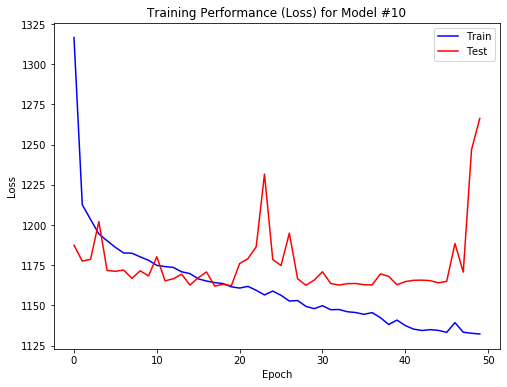


Forming the grid-search model #11 using: optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7ff86fbbc6a0>, kernel=<tensorflow.python.ops.init_ops_v2.GlorotNormal object at 0x7ff86f27c2b0>, epochs=50, batch_size=128
Train on 141238 samples, validate on 47080 samples
Epoch 1/50
141238/141238 [==============================] - 6s 42us/sample - loss: 1376.7965 - val_loss: 1189.0157
Epoch 2/50
141238/141238 [==============================] - 5s 38us/sample - loss: 1194.8552 - val_loss: 1177.6607
Epoch 3/50
141238/141238 [==============================] - 5s 37us/sample - loss: 1185.8119 - val_loss: 1178.0300
Epoch 4/50
141238/141238 [==============================] - 5s 37us/sample - loss: 1178.6941 - val_loss: 1173.1125
Epoch 5/50
141238/141238 [==============================] - 5s 37us/sample - loss: 1172.9339 - val_loss: 1166.5763
Epoch 6/50
141238/141238 [==============================] - 5s 37us/sample - loss: 1169.1613 - val_loss: 1163.4536
Epoch 7/50
141238/141238

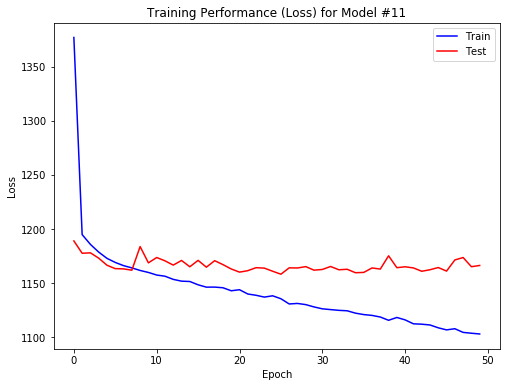


Forming the grid-search model #12 using: optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7ff86fbbc710>, kernel=<tensorflow.python.ops.init_ops_v2.RandomNormal object at 0x7ff86f27c0f0>, epochs=50, batch_size=64
Train on 141238 samples, validate on 47080 samples
Epoch 1/50
141238/141238 [==============================] - 11s 79us/sample - loss: 1394.8502 - val_loss: 1197.2502
Epoch 2/50
141238/141238 [==============================] - 10s 73us/sample - loss: 1220.1855 - val_loss: 1184.0099
Epoch 3/50
141238/141238 [==============================] - 10s 74us/sample - loss: 1212.6269 - val_loss: 1241.7310
Epoch 4/50
141238/141238 [==============================] - 10s 70us/sample - loss: 1205.4137 - val_loss: 2385.5933
Epoch 5/50
141238/141238 [==============================] - 10s 71us/sample - loss: 1199.6399 - val_loss: 5433.2590
Epoch 6/50
141238/141238 [==============================] - 10s 72us/sample - loss: 1197.1071 - val_loss: 12499.1331
Epoch 7/50
141238/

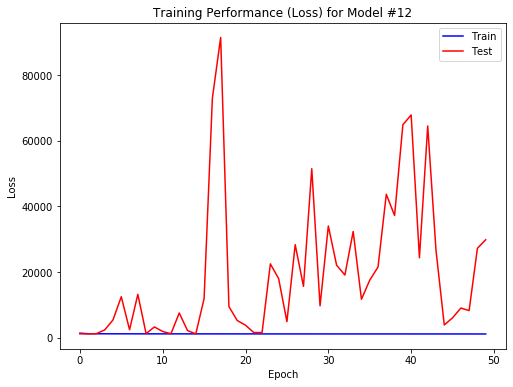


Forming the grid-search model #13 using: optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7ff86fbbc710>, kernel=<tensorflow.python.ops.init_ops_v2.RandomNormal object at 0x7ff86f27c0f0>, epochs=50, batch_size=128
Train on 141238 samples, validate on 47080 samples
Epoch 1/50
141238/141238 [==============================] - 6s 44us/sample - loss: 1296.4296 - val_loss: 1190.8751
Epoch 2/50
141238/141238 [==============================] - 5s 37us/sample - loss: 1197.4807 - val_loss: 1190.0102
Epoch 3/50
141238/141238 [==============================] - 5s 38us/sample - loss: 1190.2569 - val_loss: 1196.9607
Epoch 4/50
141238/141238 [==============================] - 5s 38us/sample - loss: 1183.7691 - val_loss: 1174.2083
Epoch 5/50
141238/141238 [==============================] - 5s 38us/sample - loss: 1176.4044 - val_loss: 1176.5832
Epoch 6/50
141238/141238 [==============================] - 5s 38us/sample - loss: 1172.3422 - val_loss: 1172.8468
Epoch 7/50
141238/141238

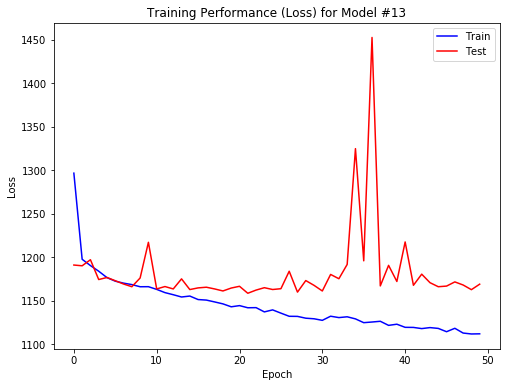


Forming the grid-search model #14 using: optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7ff86fbbc710>, kernel=<tensorflow.python.ops.init_ops_v2.Orthogonal object at 0x7ff86f27c208>, epochs=50, batch_size=64
Train on 141238 samples, validate on 47080 samples
Epoch 1/50
141238/141238 [==============================] - 11s 77us/sample - loss: 1274.8709 - val_loss: 1214.5920
Epoch 2/50
141238/141238 [==============================] - 10s 72us/sample - loss: 1214.8931 - val_loss: 1352.5108
Epoch 3/50
141238/141238 [==============================] - 10s 72us/sample - loss: 1206.0198 - val_loss: 1186.6769
Epoch 4/50
141238/141238 [==============================] - 10s 72us/sample - loss: 1198.1748 - val_loss: 1195.4872
Epoch 5/50
141238/141238 [==============================] - 10s 73us/sample - loss: 1193.6650 - val_loss: 1179.8388
Epoch 6/50
141238/141238 [==============================] - 10s 72us/sample - loss: 1189.4878 - val_loss: 1184.7597
Epoch 7/50
141238/141

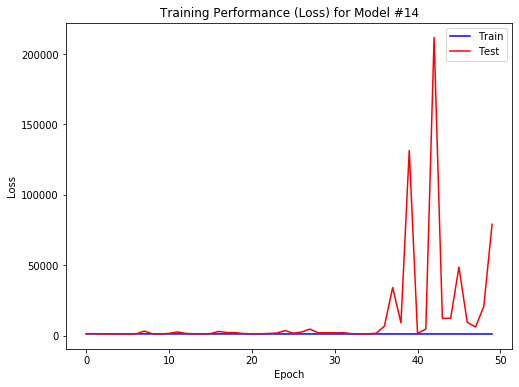


Forming the grid-search model #15 using: optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7ff86fbbc710>, kernel=<tensorflow.python.ops.init_ops_v2.Orthogonal object at 0x7ff86f27c208>, epochs=50, batch_size=128
Train on 141238 samples, validate on 47080 samples
Epoch 1/50
141238/141238 [==============================] - 6s 43us/sample - loss: 1296.3665 - val_loss: 1191.2297
Epoch 2/50
141238/141238 [==============================] - 5s 37us/sample - loss: 1198.2370 - val_loss: 2484.0465
Epoch 3/50
141238/141238 [==============================] - 5s 38us/sample - loss: 1190.2852 - val_loss: 1211.7395
Epoch 4/50
141238/141238 [==============================] - 5s 38us/sample - loss: 1183.4458 - val_loss: 2237.4612
Epoch 5/50
141238/141238 [==============================] - 5s 37us/sample - loss: 1178.8690 - val_loss: 1835.1949
Epoch 6/50
141238/141238 [==============================] - 5s 37us/sample - loss: 1174.6820 - val_loss: 1501.4678
Epoch 7/50
141238/141238 [

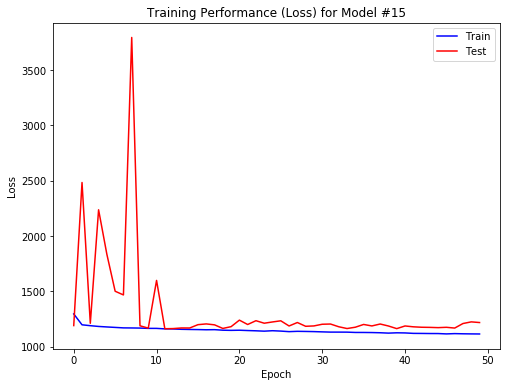


Forming the grid-search model #16 using: optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7ff86fbbc710>, kernel=<tensorflow.python.ops.init_ops_v2.GlorotNormal object at 0x7ff86f27c2b0>, epochs=50, batch_size=64
Train on 141238 samples, validate on 47080 samples
Epoch 1/50
141238/141238 [==============================] - 11s 77us/sample - loss: 1275.3633 - val_loss: 1419.4832
Epoch 2/50
141238/141238 [==============================] - 11s 75us/sample - loss: 1216.3475 - val_loss: 3061.5073
Epoch 3/50
141238/141238 [==============================] - 10s 74us/sample - loss: 1211.3816 - val_loss: 2262.2783
Epoch 4/50
141238/141238 [==============================] - 10s 71us/sample - loss: 1205.2892 - val_loss: 14761.6484
Epoch 5/50
141238/141238 [==============================] - 10s 71us/sample - loss: 1201.3014 - val_loss: 5513.4984
Epoch 6/50
141238/141238 [==============================] - 10s 71us/sample - loss: 1198.5646 - val_loss: 7228.8323
Epoch 7/50
141238/

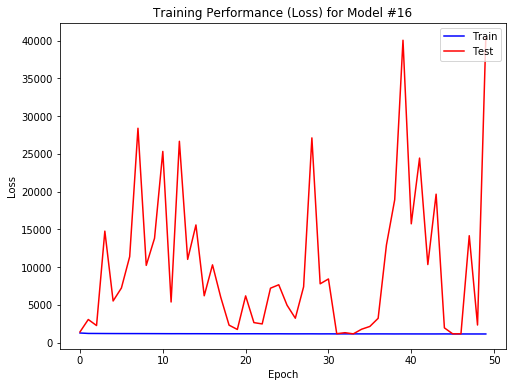


Forming the grid-search model #17 using: optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7ff86fbbc710>, kernel=<tensorflow.python.ops.init_ops_v2.GlorotNormal object at 0x7ff86f27c2b0>, epochs=50, batch_size=128
Train on 141238 samples, validate on 47080 samples
Epoch 1/50
141238/141238 [==============================] - 6s 43us/sample - loss: 1297.0030 - val_loss: 1192.2441
Epoch 2/50
141238/141238 [==============================] - 5s 38us/sample - loss: 1200.1007 - val_loss: 1184.2643
Epoch 3/50
141238/141238 [==============================] - 5s 38us/sample - loss: 1192.6579 - val_loss: 1197.0142
Epoch 4/50
141238/141238 [==============================] - 5s 38us/sample - loss: 1185.1344 - val_loss: 1182.9282
Epoch 5/50
141238/141238 [==============================] - 5s 39us/sample - loss: 1180.0208 - val_loss: 1171.8776
Epoch 6/50
141238/141238 [==============================] - 5s 38us/sample - loss: 1175.2711 - val_loss: 1175.2295
Epoch 7/50
141238/141238

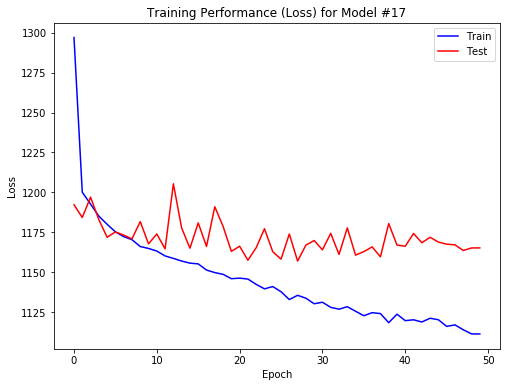


Forming the grid-search model #18 using: optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7ff86fbbc748>, kernel=<tensorflow.python.ops.init_ops_v2.RandomNormal object at 0x7ff86f27c0f0>, epochs=50, batch_size=64
Train on 141238 samples, validate on 47080 samples
Epoch 1/50
141238/141238 [==============================] - 11s 77us/sample - loss: 2919.3220 - val_loss: 2710.5376
Epoch 2/50
141238/141238 [==============================] - 10s 73us/sample - loss: 2333.6238 - val_loss: 1991.1952
Epoch 3/50
141238/141238 [==============================] - 10s 72us/sample - loss: 1629.8876 - val_loss: 1422.8516
Epoch 4/50
141238/141238 [==============================] - 10s 71us/sample - loss: 1278.7231 - val_loss: 1210.3844
Epoch 5/50
141238/141238 [==============================] - 10s 71us/sample - loss: 1212.5525 - val_loss: 1177.0222
Epoch 6/50
141238/141238 [==============================] - 10s 72us/sample - loss: 1198.9097 - val_loss: 1171.1573
Epoch 7/50
141238/1

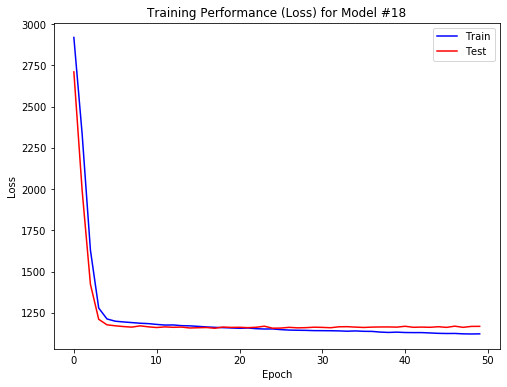


Forming the grid-search model #19 using: optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7ff86fbbc748>, kernel=<tensorflow.python.ops.init_ops_v2.RandomNormal object at 0x7ff86f27c0f0>, epochs=50, batch_size=128
Train on 141238 samples, validate on 47080 samples
Epoch 1/50
141238/141238 [==============================] - 6s 43us/sample - loss: 2911.0850 - val_loss: 2764.9418
Epoch 2/50
141238/141238 [==============================] - 5s 38us/sample - loss: 2571.3349 - val_loss: 2457.6164
Epoch 3/50
141238/141238 [==============================] - 5s 37us/sample - loss: 2169.8732 - val_loss: 2013.1515
Epoch 4/50
141238/141238 [==============================] - 5s 38us/sample - loss: 1780.8393 - val_loss: 1629.6474
Epoch 5/50
141238/141238 [==============================] - 5s 38us/sample - loss: 1469.7572 - val_loss: 1378.2918
Epoch 6/50
141238/141238 [==============================] - 5s 38us/sample - loss: 1283.6390 - val_loss: 1216.3738
Epoch 7/50
141238/141238

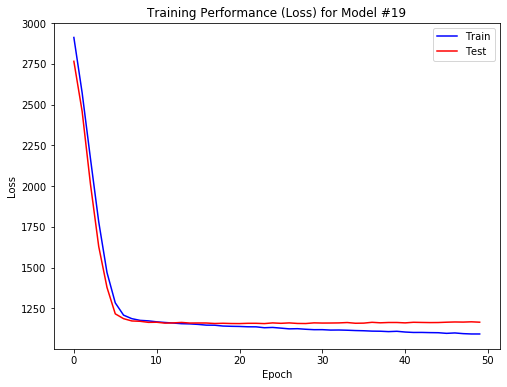


Forming the grid-search model #20 using: optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7ff86fbbc748>, kernel=<tensorflow.python.ops.init_ops_v2.Orthogonal object at 0x7ff86f27c208>, epochs=50, batch_size=64
Train on 141238 samples, validate on 47080 samples
Epoch 1/50
141238/141238 [==============================] - 11s 76us/sample - loss: 2745.3042 - val_loss: 2471.3931
Epoch 2/50
141238/141238 [==============================] - 11s 76us/sample - loss: 1990.6715 - val_loss: 1729.2984
Epoch 3/50
141238/141238 [==============================] - 10s 71us/sample - loss: 1413.1085 - val_loss: 1267.2672
Epoch 4/50
141238/141238 [==============================] - 10s 71us/sample - loss: 1231.6022 - val_loss: 1198.5779
Epoch 5/50
141238/141238 [==============================] - 10s 71us/sample - loss: 1204.3718 - val_loss: 1174.0563
Epoch 6/50
141238/141238 [==============================] - 10s 71us/sample - loss: 1196.2274 - val_loss: 1170.7794
Epoch 7/50
141238/141

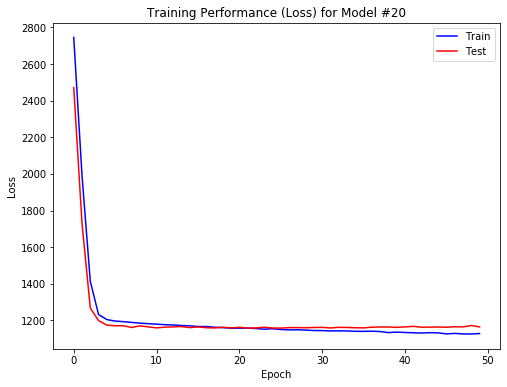


Forming the grid-search model #21 using: optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7ff86fbbc748>, kernel=<tensorflow.python.ops.init_ops_v2.Orthogonal object at 0x7ff86f27c208>, epochs=50, batch_size=128
Train on 141238 samples, validate on 47080 samples
Epoch 1/50
141238/141238 [==============================] - 6s 45us/sample - loss: 2910.1346 - val_loss: 2764.9241
Epoch 2/50
141238/141238 [==============================] - 6s 41us/sample - loss: 2570.1648 - val_loss: 2452.9126
Epoch 3/50
141238/141238 [==============================] - 6s 40us/sample - loss: 2168.5112 - val_loss: 2003.1958
Epoch 4/50
141238/141238 [==============================] - 6s 39us/sample - loss: 1779.1205 - val_loss: 1687.9269
Epoch 5/50
141238/141238 [==============================] - 6s 40us/sample - loss: 1469.1294 - val_loss: 1368.9281
Epoch 6/50
141238/141238 [==============================] - 6s 40us/sample - loss: 1283.9724 - val_loss: 1219.1757
Epoch 7/50
141238/141238 [

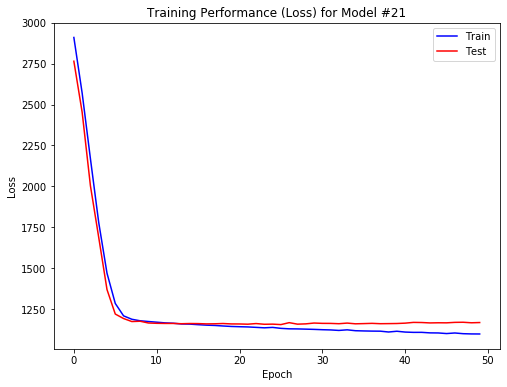


Forming the grid-search model #22 using: optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7ff86fbbc748>, kernel=<tensorflow.python.ops.init_ops_v2.GlorotNormal object at 0x7ff86f27c2b0>, epochs=50, batch_size=64
Train on 141238 samples, validate on 47080 samples
Epoch 1/50
141238/141238 [==============================] - 11s 78us/sample - loss: 2744.3702 - val_loss: 2448.2848
Epoch 2/50
141238/141238 [==============================] - 10s 73us/sample - loss: 1988.9676 - val_loss: 1704.4567
Epoch 3/50
141238/141238 [==============================] - 10s 73us/sample - loss: 1412.1897 - val_loss: 1270.2629
Epoch 4/50
141238/141238 [==============================] - 10s 74us/sample - loss: 1231.2414 - val_loss: 1196.3604
Epoch 5/50
141238/141238 [==============================] - 10s 73us/sample - loss: 1204.8185 - val_loss: 1173.9392
Epoch 6/50
141238/141238 [==============================] - 10s 73us/sample - loss: 1196.3701 - val_loss: 1174.8792
Epoch 7/50
141238/1

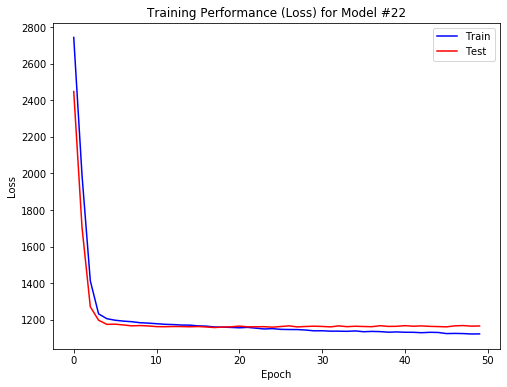


Forming the grid-search model #23 using: optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7ff86fbbc748>, kernel=<tensorflow.python.ops.init_ops_v2.GlorotNormal object at 0x7ff86f27c2b0>, epochs=50, batch_size=128
Train on 141238 samples, validate on 47080 samples
Epoch 1/50
141238/141238 [==============================] - 6s 44us/sample - loss: 2909.2652 - val_loss: 2767.3651
Epoch 2/50
141238/141238 [==============================] - 5s 39us/sample - loss: 2568.8256 - val_loss: 2432.7041
Epoch 3/50
141238/141238 [==============================] - 5s 38us/sample - loss: 2166.8441 - val_loss: 1996.6758
Epoch 4/50
141238/141238 [==============================] - 5s 38us/sample - loss: 1777.0049 - val_loss: 1656.8826
Epoch 5/50
141238/141238 [==============================] - 5s 39us/sample - loss: 1466.1088 - val_loss: 1378.8486
Epoch 6/50
141238/141238 [==============================] - 5s 38us/sample - loss: 1281.5045 - val_loss: 1221.9730
Epoch 7/50
141238/141238

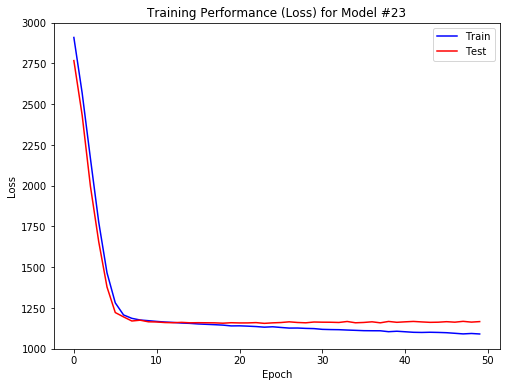


Forming the grid-search model #24 using: optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7ff86fbbc780>, kernel=<tensorflow.python.ops.init_ops_v2.RandomNormal object at 0x7ff86f27c0f0>, epochs=50, batch_size=64
Train on 141238 samples, validate on 47080 samples
Epoch 1/50
141238/141238 [==============================] - 11s 78us/sample - loss: 3031.2303 - val_loss: 3035.2123
Epoch 2/50
141238/141238 [==============================] - 10s 74us/sample - loss: 3009.7261 - val_loss: 3004.2663
Epoch 3/50
141238/141238 [==============================] - 10s 73us/sample - loss: 2970.5689 - val_loss: 2957.2280
Epoch 4/50
141238/141238 [==============================] - 10s 72us/sample - loss: 2917.0206 - val_loss: 2897.1983
Epoch 5/50
141238/141238 [==============================] - 10s 72us/sample - loss: 2849.8222 - val_loss: 2823.2079
Epoch 6/50
141238/141238 [==============================] - 10s 73us/sample - loss: 2769.4624 - val_loss: 2736.8241
Epoch 7/50
141238/1

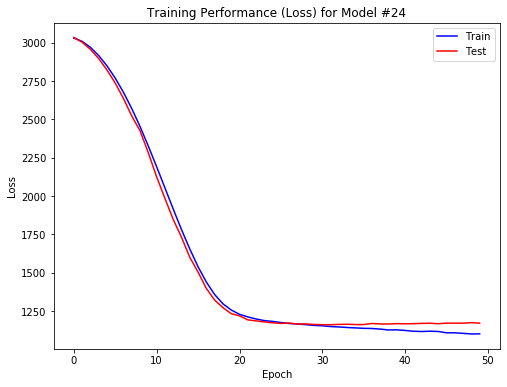


Forming the grid-search model #25 using: optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7ff86fbbc780>, kernel=<tensorflow.python.ops.init_ops_v2.RandomNormal object at 0x7ff86f27c0f0>, epochs=50, batch_size=128
Train on 141238 samples, validate on 47080 samples
Epoch 1/50
141238/141238 [==============================] - 6s 44us/sample - loss: 3030.3948 - val_loss: 3036.8314
Epoch 2/50
141238/141238 [==============================] - 5s 39us/sample - loss: 3017.6499 - val_loss: 3021.2314
Epoch 3/50
141238/141238 [==============================] - 5s 38us/sample - loss: 3000.9016 - val_loss: 3002.7050
Epoch 4/50
141238/141238 [==============================] - 5s 39us/sample - loss: 2980.6225 - val_loss: 2980.1181
Epoch 5/50
141238/141238 [==============================] - 5s 38us/sample - loss: 2956.8416 - val_loss: 2954.8489
Epoch 6/50
141238/141238 [==============================] - 5s 38us/sample - loss: 2929.6164 - val_loss: 2926.6180
Epoch 7/50
141238/141238

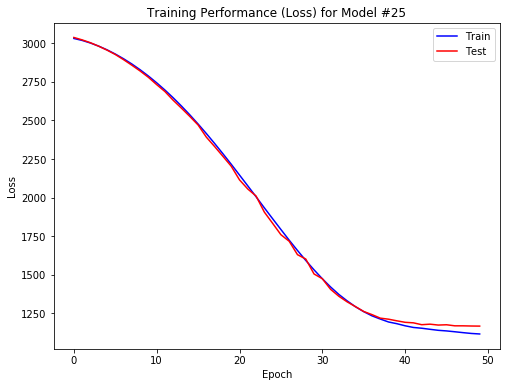


Forming the grid-search model #26 using: optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7ff86fbbc780>, kernel=<tensorflow.python.ops.init_ops_v2.Orthogonal object at 0x7ff86f27c208>, epochs=50, batch_size=64
Train on 141238 samples, validate on 47080 samples
Epoch 1/50
141238/141238 [==============================] - 11s 80us/sample - loss: 3024.4213 - val_loss: 3022.6256
Epoch 2/50
141238/141238 [==============================] - 10s 73us/sample - loss: 2992.0366 - val_loss: 2982.7669
Epoch 3/50
141238/141238 [==============================] - 10s 72us/sample - loss: 2945.1865 - val_loss: 2927.8377
Epoch 4/50
141238/141238 [==============================] - 10s 74us/sample - loss: 2884.6687 - val_loss: 2862.3855
Epoch 5/50
141238/141238 [==============================] - 11s 75us/sample - loss: 2810.7208 - val_loss: 2781.3348
Epoch 6/50
141238/141238 [==============================] - 10s 73us/sample - loss: 2723.7670 - val_loss: 2687.3197
Epoch 7/50
141238/141

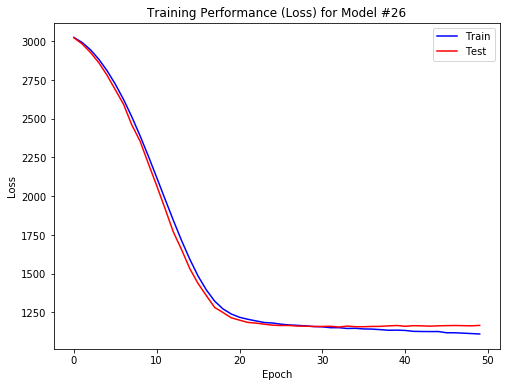


Forming the grid-search model #27 using: optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7ff86fbbc780>, kernel=<tensorflow.python.ops.init_ops_v2.Orthogonal object at 0x7ff86f27c208>, epochs=50, batch_size=128
Train on 141238 samples, validate on 47080 samples
Epoch 1/50
141238/141238 [==============================] - 7s 47us/sample - loss: 3030.0259 - val_loss: 3035.6958
Epoch 2/50
141238/141238 [==============================] - 6s 39us/sample - loss: 3017.0736 - val_loss: 3019.7951
Epoch 3/50
141238/141238 [==============================] - 5s 38us/sample - loss: 3000.1582 - val_loss: 3002.3857
Epoch 4/50
141238/141238 [==============================] - 6s 40us/sample - loss: 2979.7114 - val_loss: 2979.7625
Epoch 5/50
141238/141238 [==============================] - 6s 40us/sample - loss: 2955.7885 - val_loss: 2954.6891
Epoch 6/50
141238/141238 [==============================] - 5s 39us/sample - loss: 2928.4127 - val_loss: 2922.1257
Epoch 7/50
141238/141238 [

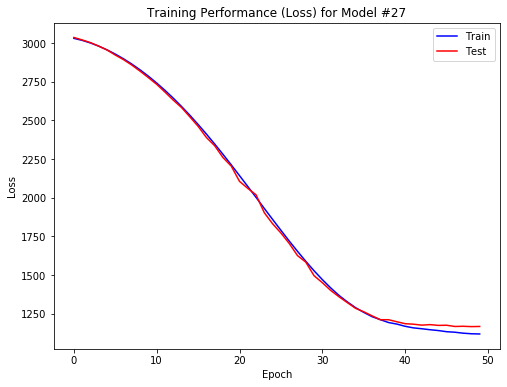


Forming the grid-search model #28 using: optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7ff86fbbc780>, kernel=<tensorflow.python.ops.init_ops_v2.GlorotNormal object at 0x7ff86f27c2b0>, epochs=50, batch_size=64
Train on 141238 samples, validate on 47080 samples
Epoch 1/50
141238/141238 [==============================] - 11s 80us/sample - loss: 3023.9160 - val_loss: 3021.2578
Epoch 2/50
141238/141238 [==============================] - 10s 74us/sample - loss: 2991.0966 - val_loss: 2980.6602
Epoch 3/50
141238/141238 [==============================] - 10s 74us/sample - loss: 2943.8766 - val_loss: 2926.0919
Epoch 4/50
141238/141238 [==============================] - 10s 74us/sample - loss: 2883.0043 - val_loss: 2859.3035
Epoch 5/50
141238/141238 [==============================] - 10s 74us/sample - loss: 2808.6925 - val_loss: 2778.3308
Epoch 6/50
141238/141238 [==============================] - 10s 73us/sample - loss: 2721.3816 - val_loss: 2685.9829
Epoch 7/50
141238/1

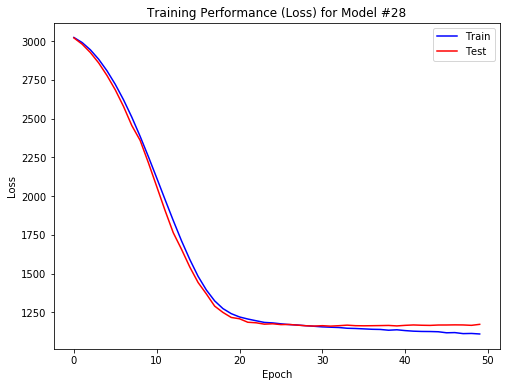


Forming the grid-search model #29 using: optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7ff86fbbc780>, kernel=<tensorflow.python.ops.init_ops_v2.GlorotNormal object at 0x7ff86f27c2b0>, epochs=50, batch_size=128
Train on 141238 samples, validate on 47080 samples
Epoch 1/50
141238/141238 [==============================] - 6s 46us/sample - loss: 3029.6531 - val_loss: 3035.3854
Epoch 2/50
141238/141238 [==============================] - 5s 39us/sample - loss: 3016.4119 - val_loss: 3018.6593
Epoch 3/50
141238/141238 [==============================] - 5s 39us/sample - loss: 2999.2910 - val_loss: 3000.7686
Epoch 4/50
141238/141238 [==============================] - 5s 39us/sample - loss: 2978.6309 - val_loss: 2979.2949
Epoch 5/50
141238/141238 [==============================] - 6s 40us/sample - loss: 2954.5072 - val_loss: 2952.2407
Epoch 6/50
141238/141238 [==============================] - 6s 43us/sample - loss: 2926.9180 - val_loss: 2922.7851
Epoch 7/50
141238/141238

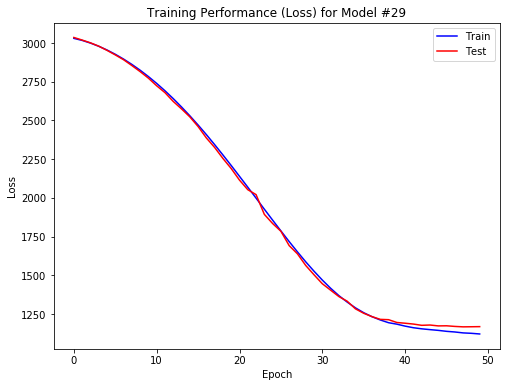


Best score (lowest validation loss) found via grid search: loss=1163.463993 RMSE=34.109588 from model iteration #9
The best modeling parameters are: optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7ff86fbbc6a0>, kernel=<tensorflow.python.ops.init_ops_v2.Orthogonal object at 0x7ff86f27c208>, epochs=50, batch_size=128
Total time for performing grid-search of the best parameters: 3:17:12.635568


In [0]:
# Set up grid search using different epochs, batch sizes, and optimizers
startTimeModule = datetime.now()
optz_1 = tf.optimizers.Adam(learning_rate=0.001)
optz_2 = tf.optimizers.Adam(learning_rate=0.005)
optz_3 = tf.optimizers.Adam(learning_rate=0.01)
optz_4 = tf.optimizers.Adam(learning_rate=0.0005)
optz_5 = tf.optimizers.Adam(learning_rate=0.0001)
optimizer_grid = [optz_1, optz_2, optz_3, optz_4, optz_5]
print('Optimizer candidate #1 has the object ID of', optz_1)
print('Optimizer candidate #2 has the object ID of', optz_2)
print('Optimizer candidate #3 has the object ID of', optz_3)
print('Optimizer candidate #4 has the object ID of', optz_4)
print('Optimizer candidate #5 has the object ID of', optz_5)

init_1 = tf.initializers.RandomNormal(seed=seedNum)
init_2 = tf.initializers.Orthogonal(seed=seedNum)
init_3 = tf.initializers.GlorotNormal(seed=seedNum)
init_grid = [init_1, init_2, init_3]
print('Initializer candidate #1 has the object ID of', init_1)
print('Initializer candidate #2 has the object ID of', init_2)
print('Initializer candidate #2 has the object ID of', init_3)

epoch_grid = [default_epoch]
batch_grid = [default_batch, int(default_batch*2)]

best_score = float('inf')
grid_iteration = 0
best_iteration = 0
best_optimizer = default_optimizer
best_kernel_init = default_kernel_init
best_epoch = default_epoch
best_batch = default_batch

for optimizer in optimizer_grid:
    for kernel_init in init_grid:
        for epoch_num in epoch_grid:
            for batch_num in batch_grid:
                print('\nForming the grid-search model #%d using: optimizer=%s, kernel=%s, epochs=%d, batch_size=%d' 
                      % (grid_iteration, optimizer, kernel_init, epoch_num, batch_num))
                reset_random(seedNum)
                grid_model = create_customized_model(optimizer, kernel_init)
                grid_hist = grid_model.fit(X_train, y_train, epochs=epoch_num, batch_size=batch_num, 
                                           validation_data=(X_test, y_test), verbose=1)
                
                # Summarize model training hisotry
                fig, axs = plt.subplots(1, 1, figsize=(8,6))
                plt.subplot(111)
                plt.plot(grid_hist.history['loss'], color='blue', label='train')
                plt.plot(grid_hist.history['val_loss'], color='red', label='test')
                graph_title = 'Training Performance (Loss) for Model #' + str(grid_iteration)
                plt.title(graph_title)
                plt.ylabel('Loss')
                plt.xlabel('Epoch')
                plt.legend(['Train', 'Test'], loc='upper right')
                plt.show()

                if(grid_hist.history['val_loss'][-1] < best_score):
                    best_score = grid_hist.history['val_loss'][-1]
                    best_iteration = grid_iteration
                    best_optimizer = optimizer
                    best_kernel_init = kernel_init
                    best_epoch = epoch_num
                    best_batch = batch_num
                grid_iteration = grid_iteration + 1

# summarize results
print("\nBest score (lowest validation loss) found via grid search: loss=%f RMSE=%f from model iteration #%d"
      % (best_score, math.sqrt(best_score), best_iteration))
print('The best modeling parameters are: optimizer=%s, kernel=%s, epochs=%d, batch_size=%d'
      % (best_optimizer, best_kernel_init, best_epoch, best_batch))
print('Total time for performing grid-search of the best parameters:', (datetime.now() - startTimeModule))

In [0]:
if (notifyStatus): email_notify("Phase 4 Optimize Model completed! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

# Section 5. Finalize Model

In [0]:
if (notifyStatus): email_notify("Phase 5 Finalize Model has begun! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

In [0]:
if (notifyStatus): email_notify("Phase 5 Finalize Model completed! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

In [0]:
print ('Total time for the script:',(datetime.now() - startTimeScript))

Total time for the script: 4:11:10.484131
